## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import numpy as np
import lux
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("Play Store Data.csv")

In [3]:
df1

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [97]:
df2 = pd.read_csv("User Reviews.csv")

In [98]:
df2.head(2)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [99]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<b> first of all let us check df1 which is about Play Store Data

In [100]:
df1.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<li> Here we can see that there are some missing values in the data. 
<li> So let us find out which columns have missing values

In [101]:
df1.isnull().any()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

df1.isnull().value_counts()

In [102]:
df1.isnull().any().value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<b> <li> Here we see that out of 13 columns, 5 columns have null values. 8 columns have no missing values
    <li> Let us find out total number of missing values column wise

In [103]:
df1.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [104]:
#let us find out total number of rows
df1.shape

(10841, 13)

<b> We observer that there are very few null values. So we can delete those rows.<b>

In [105]:
df1.dropna(inplace=True)

<b> Also we will drop the duplicate values from dataframe
    

In [106]:
df1.drop_duplicates(inplace=True)

In [107]:
# let us see the new number of rows in dataframe
df1.shape

(8886, 13)

In [108]:
# now let us take a look at records
df1.head(20)

C:\Users\mukta\anaconda3\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Last Updated' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If Last Updated is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'Last Updated':'quantitative'})
C:\Users\mukta\anaconda3\lib\site-packages\IPython\core\formatters.py:918: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas di

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


<b> We observe that the data needs some cleaning<b>
 <ol>
     <li> there is only one column with numerical values
     <li> column size has M letter in it
     <li> column installs has a + sign that should be removed
     <li> Column Last updated should be converted to datetime type

In [109]:
# removing '+' sign from installs
df1['Installs'] = df1['Installs'].map(lambda x: x.rstrip('+'))

In [110]:
df1['Installs']

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Now we have to remove , from values and convert the column to numeric


In [111]:
df1['Installs'] = pd.to_numeric(df1['Installs'].str.replace(",",""))

In [112]:
df1.Installs

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Data Cleaning for 'Size' column
<b> 
    <li> In this column we see 'M' at the end of value. It denote 'Megabytes' or Kbs. 
    <li> In order to convert this column to numeric, first we have to have a common unit for all values.
    <li> Let us convert all the units to Megabytes. To do so, we need to divide values in Kbs by 1024.


<b> We also observe there are values 'varies with device' that should be replaced by a number. also we need to ampute the null values with some other value

In [113]:
df1['Size'] = df1['Size'].map(lambda x: x.rstrip('M'))
df1['Size'] = df1['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
df1['Size'] = df1['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)

In [114]:
# let us find out null values in column 'Size'
df1['Size'] = df1['Size'].fillna(0)
df1['Size'].isnull().sum()

0

### let us convert column 'Last Updated' to datetime

In [115]:

df1['Last Updated'] = pd.to_datetime(df1['Last Updated'])

### Column 'Price' 
There is a $ sign in values, let us remove that

In [116]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [117]:
df1['Price'] = df1['Price'].str.lstrip('$')

In [118]:
df1['Price'] = pd.to_numeric(df1['Price'])


In [119]:
df1['Price']

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [120]:
df1.head(4)

C:\Users\mukta\anaconda3\lib\site-packages\IPython\core\formatters.py:918: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

C:\Users\mukta\anaconda3\lib\site-packages\lux\core\frame.py:632: UserWarning:Traceback (most recent call last):
  File "C:\Users\mukta\anaconda3\lib\site-packages\lux\core\frame.py", line 594, in _ipython_display_
    self.maintain_recs()
  File "C:\Users\mukta\anaconda3\lib\site-packages\lux\core\frame.py", line 436, in maintain_recs
    custom_action_collection = custom_actions(rec_df)
  File "C:\Users\mukta\anaconda3\lib\site-packages\lux\action\custom.py", line 76, in custom_actions
    recommendation = lux.config.actions[action_name].action(ldf)
  File "C:\Users\mukta\anaconda3\lib\site-packages\lux\action\correlation.py", line 50, in correlation
    vlist = VisList(intent, ldf)
  File "C:\Users\mukta\anaconda3\lib\si

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up


In [121]:
df1.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   object        
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   int64         
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   float64       
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 971.9+ KB


<b> <li>Now we can see there are no null values in our dataset. 
 <b> <li>So now we can focus on categorical columns and see how we can convert them into numeric columns

## Find out unique values in each column

In [122]:
df1['App'].nunique()

8190

In [123]:
df1['Category'].nunique()

33

In [124]:
df1['Type'].nunique()

2

In [125]:
df1['Rating'].nunique()

39

In [126]:
df1['Content Rating'].nunique()

6

In [127]:
df1['Genres'].nunique()

115

In [128]:
df1['Size'].nunique()

193

### From above analysis, we get the unique values in each column.
<b> we can summarize this info as follows - 
<table>
  <tr>
    <th>Column name</th>
    <th>Unique Value count</th>
  </tr>
  <tr>
    <td>App</td>
    <td>8190</td>
  </tr>
  <tr>
    <td>Category</td>
    <td>33</td>
  </tr>
<tr>
    <td>Type</td>
    <td>2</td>
  </tr>
<tr>
    <td>Content Rating</td>
    <td>6</td>
  </tr>
<tr>
    <td>Genres</td>
    <td>115</td>
  </tr>
<tr>
    <td>Size</td>
    <td>193</td>
  </tr>
</table>

## Find out descriptive Statistics of Dataset

In [129]:
df1.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [130]:
# let us see the categories in dataset
df1.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype='<U19')

In [131]:
#let us find out category wise distribution of data
df1.groupby(df1['Category']).mean()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<b> On an average, app from each category has a rating of 4 and above </b>

In [85]:
df1.groupby(df1['Type']).mean()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<b> There is no difference between rating of free and paid apps</b>

In [86]:
df1.groupby(['Category', 'Content Rating']).mean()


C:\Users\mukta\anaconda3\lib\site-packages\IPython\core\formatters.py:918: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

C:\Users\mukta\anaconda3\lib\site-packages\lux\core\frame.py:632: UserWarning:Traceback (most recent call last):
  File "C:\Users\mukta\anaconda3\lib\site-packages\lux\core\frame.py", line 594, in _ipython_display_
    self.maintain_recs()
  File "C:\Users\mukta\anaconda3\lib\site-packages\lux\core\frame.py", line 451, in maintain_recs
    self._widget = rec_df.render_widget()
  File "C:\Users\mukta\anaconda3\lib\site-packages\lux\core\frame.py", line 681, in render_widget
    widgetJSON = self.to_JSON(self._rec_info, input_current_vis=input_current_vis)
  File "C:\Users\mukta\anaconda3\lib\site-packages\lux\core\frame.py", line 713, in to_JSON
    widget_spec["current_vis"] = LuxDataFrame.current_vis_to_JSON(
  File "C:\Us

Rating      Installs     Price
Category          Content Rating                                  
ART_AND_DESIGN    Everyone        4.366667  1.117861e+06  0.104737
                  Everyone 10+    4.700000  5.000000e+05  0.000000
                  Teen            4.466667  2.000333e+07  0.000000
AUTO_AND_VEHICLES Everyone        4.188732  5.933775e+05  0.028028
                  Everyone 10+    4.300000  1.000000e+06  0.000000
...                                    ...           ...       ...
VIDEO_PLAYERS     Teen            4.087500  1.456732e+08  0.000000
WEATHER           Everyone        4.229577  5.837979e+06  0.414507
                  Everyone 10+    4.400000  1.000000e+07  0.000000
                  Mature 17+      4.700000  1.000000e+06  0.000000
                  Teen            4.450000  3.000000e+05  0.000000

[113 rows x 3 columns]

## Study correlation between different variables

In [87]:
df1.corr()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:>

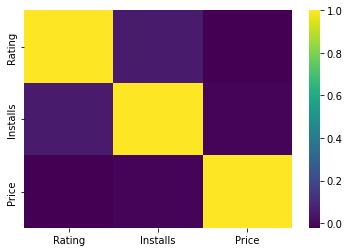

In [88]:
# draw a correlation heatmap for visualization
sns.heatmap(df1.corr(), cbar=True, cmap='viridis')

# Let us Use a visualization module names Lux.


In [44]:
import lux
import pandas as pd

In [45]:
df1 = pd.read_csv("Play Store Data.csv")

In [46]:
df1

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [93]:
from lux.vis.VisList import VisList
VisList(["Category=?","Installs"],df1)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…